<a href="https://colab.research.google.com/github/hackerpranavpandey/Machine-Learning-Course/blob/main/Adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions

In [ ]:
df=pd.DataFrame()

In [ ]:
df['X1']=[1,2,3,4,5,6,6,7,9,9]
df['X2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]

In [ ]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [ ]:
df.info

<bound method DataFrame.info of    X1  X2  label
0   1   5      1
1   2   3      1
2   3   6      0
3   4   8      1
4   5   1      0
5   6   9      1
6   6   5      0
7   7   8      1
8   9   9      0
9   9   2      0>

<Axes: xlabel='X1', ylabel='X2'>

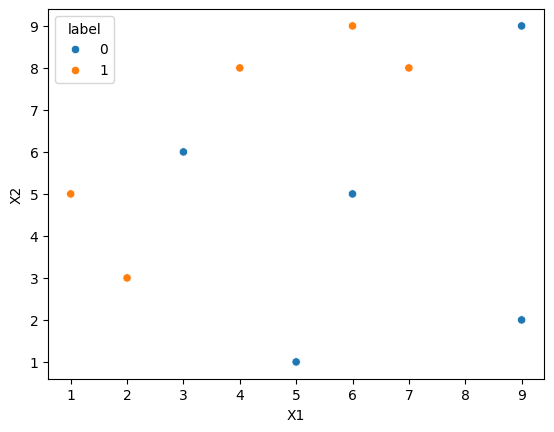

In [ ]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [ ]:
df.shape

(10, 3)

In [ ]:
df['weights']=1/df.shape[0]

In [ ]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt1=DecisionTreeClassifier()

In [ ]:
X=df.iloc[:,0:2].values
y=df.iloc[:,2].values

In [ ]:
dt1.fit(X,y)

DecisionTreeClassifier()

[Text(0.5, 0.9, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.7, 'x[0] <= 8.0\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.5, 0.5, 'x[1] <= 7.0\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.3333333333333333, 0.3, 'x[0] <= 2.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.16666666666666666, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8333333333333334, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

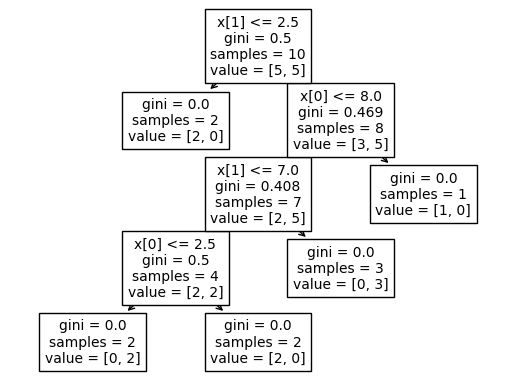

In [ ]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

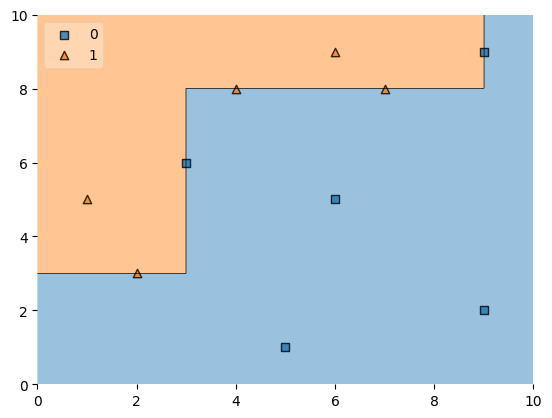

In [ ]:
plot_decision_regions(X,y,clf=dt1,legend=2)

In [ ]:
df['y_pred']=dt1.predict(X)

In [ ]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,0
7,7,8,1,0.1,1
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [ ]:
## calculate weight
def calculate_model_weight(error):
  return 0.5*np.log((1-error)/error+0.00000001)

In [ ]:
alpha_1=calculate_model_weight(0.3)
alpha_1

0.42364893019360184

In [ ]:
## update weights
def update_row_weights(row,alpha=0.432):
  if row['label']==row['y_pred']:
    return row['weights']*np.exp(-alpha)
  else:
    return row['weights']*np.exp(alpha)

In [ ]:
df['updated_weights']=df.apply(update_row_weights,axis=1)

In [ ]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.064921
1,2,3,1,0.1,1,0.064921
2,3,6,0,0.1,0,0.064921
3,4,8,1,0.1,1,0.064921
4,5,1,0,0.1,0,0.064921
5,6,9,1,0.1,1,0.064921
6,6,5,0,0.1,0,0.064921
7,7,8,1,0.1,1,0.064921
8,9,9,0,0.1,0,0.064921
9,9,2,0,0.1,0,0.064921


In [ ]:
df['normalized_weights']=df['updated_weights']/df['updated_weights'].sum()

In [ ]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.064921,0.1
1,2,3,1,0.1,1,0.064921,0.1
2,3,6,0,0.1,0,0.064921,0.1
3,4,8,1,0.1,1,0.064921,0.1
4,5,1,0,0.1,0,0.064921,0.1
5,6,9,1,0.1,1,0.064921,0.1
6,6,5,0,0.1,0,0.064921,0.1
7,7,8,1,0.1,1,0.064921,0.1
8,9,9,0,0.1,0,0.064921,0.1
9,9,2,0,0.1,0,0.064921,0.1


In [ ]:
df['upper_range']=np.cumsum(df['normalized_weights'])

In [ ]:
df['lower_range']=df['upper_range']-df['normalized_weights']

In [ ]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,upper_range,lower_range
0,1,5,1,0.1,1,0.064921,0.1,0.1,0.0
1,2,3,1,0.1,1,0.064921,0.1,0.2,0.1
2,3,6,0,0.1,0,0.064921,0.1,0.3,0.2
3,4,8,1,0.1,1,0.064921,0.1,0.4,0.3
4,5,1,0,0.1,0,0.064921,0.1,0.5,0.4
5,6,9,1,0.1,1,0.064921,0.1,0.6,0.5
6,6,5,0,0.1,0,0.064921,0.1,0.7,0.6
7,7,8,1,0.1,1,0.064921,0.1,0.8,0.7
8,9,9,0,0.1,0,0.064921,0.1,0.9,0.8
9,9,2,0,0.1,0,0.064921,0.1,1.0,0.9


In [ ]:
## upsampling
def create_new_dataset(df):
  indices=[]
  for i in range(df.shape[0]):
    a=np.random.random()
    for index,row in df.iterrows():
      if row['upper_range']>a and a>row['lower_range']:
        indices.append(index)
  return indices

In [ ]:
## 10 random number generate karo aur check karo kis range me aa raha hai
index_values=create_new_dataset(df)
index_values

[2, 0, 5, 1, 4, 6, 8, 8, 5, 0]

In [ ]:
df_2=df.iloc[index_values,[0,1,2,3]]

In [ ]:
df_2

,X1,X2,label,weights
2,3,6,0,0.1
0,1,5,1,0.1
5,6,9,1,0.1
1,2,3,1,0.1
4,5,1,0,0.1
6,6,5,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
5,6,9,1,0.1
0,1,5,1,0.1


In [ ]:
dt2=DecisionTreeClassifier()

In [ ]:
dt2.fit(df_2.iloc[:,0:2],df_2.iloc[:,2])

DecisionTreeClassifier()

In [ ]:
df_2['y_pred']=dt2.predict(df_2.iloc[:,0:2])

In [ ]:
df_2

,X1,X2,label,weights,y_pred
2,3,6,0,0.1,0
0,1,5,1,0.1,1
5,6,9,1,0.1,1
1,2,3,1,0.1,1
4,5,1,0,0.1,0
6,6,5,0,0.1,0
8,9,9,0,0.1,0
8,9,9,0,0.1,0
5,6,9,1,0.1,1
0,1,5,1,0.1,1


In [ ]:
alpha_2=calculate_model_weight(0.1)

In [ ]:
alpha_2

1.0986122892236654

In [ ]:
def update_row_weights(row,alpha=1.09): ## new alpha value
  if row['label']==row['y_pred']:
    return row['weights']*np.exp(-alpha)
  else:
    return row['weights']*np.exp(alpha)

In [ ]:
df_2['updated_weights']=df_2.apply(update_row_weights,axis=1)

In [ ]:
df_2

,X1,X2,label,weights,y_pred,updared_weights,updated_weights
2,3,6,0,0.1,0,0.033622,0.033622
0,1,5,1,0.1,1,0.033622,0.033622
5,6,9,1,0.1,1,0.033622,0.033622
1,2,3,1,0.1,1,0.033622,0.033622
4,5,1,0,0.1,0,0.033622,0.033622
6,6,5,0,0.1,0,0.033622,0.033622
8,9,9,0,0.1,0,0.033622,0.033622
8,9,9,0,0.1,0,0.033622,0.033622
5,6,9,1,0.1,1,0.033622,0.033622
0,1,5,1,0.1,1,0.033622,0.033622


In [ ]:
df_2['normalized']=df['updated_weights']/df['updated_weights'].sum()

In [ ]:
df_2.drop(columns=['updared_weights'],inplace=True)

In [ ]:
df_2

,X1,X2,label,weights,y_pred,updated_weights,normalized
2,3,6,0,0.1,0,0.033622,0.1
0,1,5,1,0.1,1,0.033622,0.1
5,6,9,1,0.1,1,0.033622,0.1
1,2,3,1,0.1,1,0.033622,0.1
4,5,1,0,0.1,0,0.033622,0.1
6,6,5,0,0.1,0,0.033622,0.1
8,9,9,0,0.1,0,0.033622,0.1
8,9,9,0,0.1,0,0.033622,0.1
5,6,9,1,0.1,1,0.033622,0.1
0,1,5,1,0.1,1,0.033622,0.1


In [ ]:
df_2["upper_limit"]=np.cumsum(df_2['normalized'])

In [ ]:
df_2['lower_limit']=df_2['upper_limit']-df_2['normalized']

In [ ]:
df_2

,X1,X2,label,weights,y_pred,updated_weights,normalized,upper_limit,lower_limit
2,3,6,0,0.1,0,0.033622,0.1,0.1,0.0
0,1,5,1,0.1,1,0.033622,0.1,0.2,0.1
5,6,9,1,0.1,1,0.033622,0.1,0.3,0.2
1,2,3,1,0.1,1,0.033622,0.1,0.4,0.3
4,5,1,0,0.1,0,0.033622,0.1,0.5,0.4
6,6,5,0,0.1,0,0.033622,0.1,0.6,0.5
8,9,9,0,0.1,0,0.033622,0.1,0.7,0.6
8,9,9,0,0.1,0,0.033622,0.1,0.8,0.7
5,6,9,1,0.1,1,0.033622,0.1,0.9,0.8
0,1,5,1,0.1,1,0.033622,0.1,1.0,0.9
